In [6]:
import kagglehub
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Downloading and extracting the audio files

In [7]:
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

genres = [
    "blues",
    "classical",
    "country",
    "disco",
    "hiphop",
    "jazz",
    "metal",
    "pop",
    "reggae",
    "rock",
]
sr = 22050

songs = {}
for genre in genres:
    songs[genre] = []
    for i in range(100):
        song, sr = librosa.load(
            f"{path}/Data/genres_original/{genre}/{genre}.000{i:02d}.wav"
        )
        songs[genre].append(song)

In [8]:
# 
columns = pd.read_csv(f"{path}/Data/features_30_sec.csv").columns
columns


Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

# Feature extraction for the songs

In [10]:
# Extract the following features from the audio files: 
'''
['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label']
'''
# These features are extracted from the audio files using the librosa library as follows:
def extract_features(song):
    # Extract features from the audio file
    stft = np.abs(librosa.stft(song))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    rms = librosa.feature.rms(y=song)
    spectral_centroid = librosa.feature.spectral_centroid(y=song, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=song, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=song, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=song)
    mfccs = librosa.feature.mfcc(y=song, sr=sr, n_mfcc=20)

    # Calculate mean and variance for each feature
    features = {
        "chroma_stft_mean": np.mean(chroma_stft),
        "chroma_stft_var": np.var(chroma_stft),
        "rms_mean": np.mean(rms),
        "rms_var": np.var(rms),
        "spectral_centroid_mean": np.mean(spectral_centroid),
        "spectral_centroid_var": np.var(spectral_centroid),
        "spectral_bandwidth_mean": np.mean(spectral_bandwidth),
        "spectral_bandwidth_var": np.var(spectral_bandwidth),
        "rolloff_mean": np.mean(rolloff),
        "rolloff_var": np.var(rolloff),
        "zero_crossing_rate_mean": np.mean(zero_crossing_rate),
        "zero_crossing_rate_var": np.var(zero_crossing_rate),
        "tempo": librosa.beat.tempo(y=song, sr=sr)[0],
    }

    # Calculate mean and variance for MFCCs
    for i in range(20):
        features[f"mfcc{i + 1}_mean"] = np.mean(mfccs[i])
        features[f"mfcc{i + 1}_var"] = np.var(mfccs[i])

    return features

In [ ]:
# A CSV file is created to store the features and labels for each song
features_list = []
for genre in genres:
    for i, song in enumerate(songs[genre]):
        features = extract_features(song)
        features["label"] = genre
        features_list.append(features)

df = pd.DataFrame(features_list)
print(df.head())
df.to_csv("features.csv", index=False)


# The CSV file is read and the features are normalized
df = pd.read_csv("features.csv")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(columns=["label"])
y = df["label"]
X = scaler.fit_transform(X)

# The dataset is split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_7037/1283929690.py:44: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  "tempo": librosa.beat.tempo(y=song, sr=sr)[0],


   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.593592         0.051505  0.130184  0.002828   
1          0.554565         0.058720  0.095908  0.002373   
2          0.591553         0.051497  0.175473  0.002751   
3          0.626295         0.046662  0.141040  0.006348   
4          0.519970         0.062237  0.091501  0.002305   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1784.122641          129745.484419              2002.412407   
1             1530.261767          375915.508778              2038.987608   
2             1552.832481          156471.010904              1747.754087   
3             1070.153418          184366.009438              1596.422564   
4             1835.128513          343249.495746              1748.410758   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_var  \
0            85834.410406   3805.723030  9.012529e+05  ...   52.424534   
1           213905.103191   

## Model training, validation and evaluation

SVM Classifier with linear kernel
Accuracy: 0.5640 (+/- 0.1112)
SVM Classifier with poly kernel
Accuracy: 0.5080 (+/- 0.1492)
SVM Classifier with rbf kernel
Accuracy: 0.5910 (+/- 0.1594)
SVM Classifier with sigmoid kernel
Accuracy: 0.4860 (+/- 0.1217)

Best SVM Classifier: rbf kernel
Accuracy: 0.6850
Precision: 0.6968
Recall: 0.6850
F1 Score: 0.6821


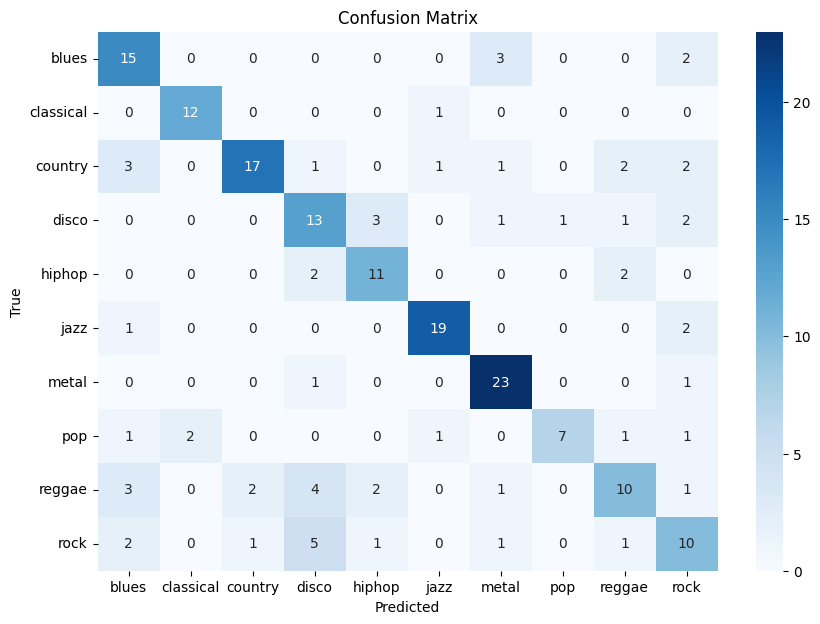

In [ ]:
# Creating an SVM, Random Forest Classifier, XGBoost Classifier, and a KNN Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

# SVM Classifier
best_kernel = None
best_accuracy = 0
best_model = None

kernels = ["linear", "poly", "rbf", "sigmoid"]
for kernel in kernels:
    svm = SVC(kernel=kernel)
    scores = cross_val_score(svm, X, y, cv=5, scoring="accuracy")
    mean_accuracy = scores.mean()
    print(f"SVM Classifier with {kernel} kernel")
    print(f"Accuracy: {mean_accuracy:.4f} (+/- {scores.std() * 2:.4f})")
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_kernel = kernel
        best_model = svm

# Train the best model on the training data
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Print metrics for the best model
print(f"\nBest SVM Classifier: {best_kernel} kernel")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best, average='weighted'):.4f}")

# Plot the confusion matrix using seaborn in a color-graded manner
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Best SVM Classifier')
plt.show()
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_best))




Random Forest with 100 estimators
Accuracy: 0.5630 (+/- 0.1260)
Random Forest with 200 estimators
Accuracy: 0.5640 (+/- 0.1359)
Random Forest with 300 estimators
Accuracy: 0.5550 (+/- 0.1049)
Random Forest with 400 estimators
Accuracy: 0.5660 (+/- 0.1067)
Random Forest with 500 estimators
Accuracy: 0.5610 (+/- 0.1030)

Best Random Forest Classifier: 400 estimators
Accuracy: 0.6750
Precision: 0.6773
Recall: 0.6750
F1 Score: 0.6722


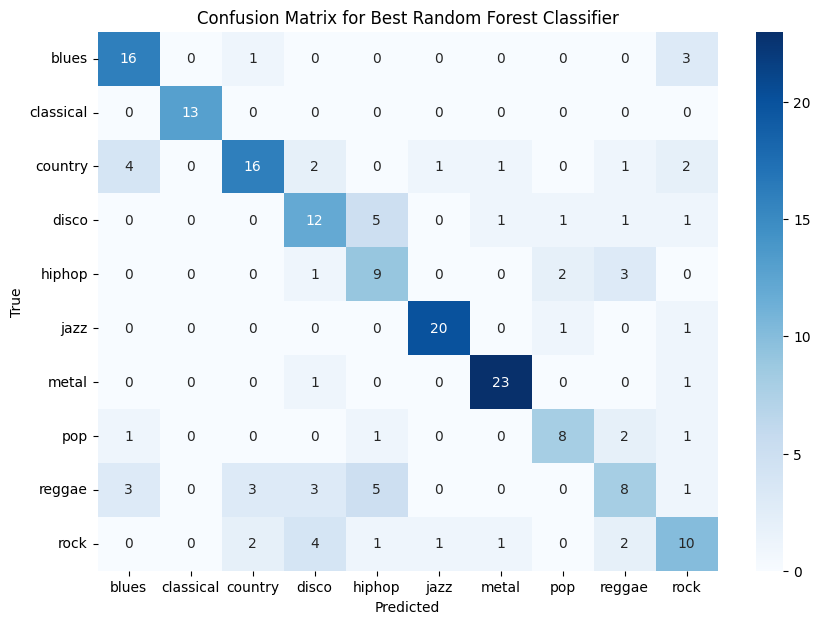

In [ ]:
# Perform k-cross validation for Random Forest with different n_estimators
best_n_estimators = None
best_accuracy = 0
best_rf_model = None

n_estimators_values = [100, 200, 300, 400, 500]
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
    mean_accuracy = scores.mean()
    print(f"Random Forest with {n} estimators")
    print(f"Accuracy: {mean_accuracy:.4f} (+/- {scores.std() * 2:.4f})")
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_n_estimators = n
        best_rf_model = rf

# Train the best model on the training data
best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)

# Print metrics for the best model
print(f"\nBest Random Forest Classifier: {best_n_estimators} estimators")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf, average='weighted'):.4f}")

# Plot the confusion matrix using seaborn in a color-graded manner
cm = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Best Random Forest Classifier')
plt.show()


XGBoost with 100 estimators
Accuracy: 0.5840 (+/- 0.1425)
XGBoost with 200 estimators
Accuracy: 0.5870 (+/- 0.1495)
XGBoost with 300 estimators
Accuracy: 0.5760 (+/- 0.1406)
XGBoost with 400 estimators
Accuracy: 0.5790 (+/- 0.1439)
XGBoost with 500 estimators
Accuracy: 0.5750 (+/- 0.1459)

Best XGBoost Classifier: 200 estimators
Accuracy: 0.6650
Precision: 0.6698
Recall: 0.6650
F1 Score: 0.6640


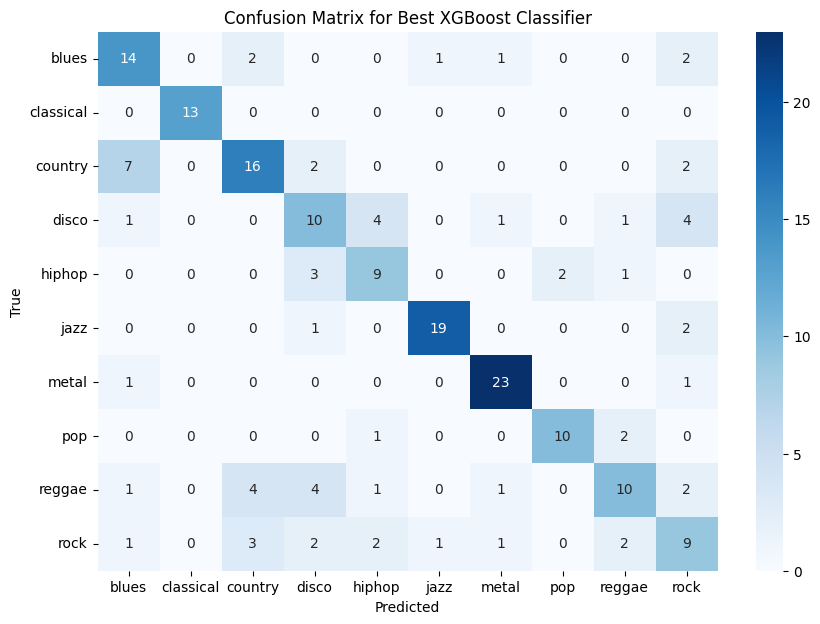

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels as numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Perform k-cross validation for XGBoost with different n_estimators
best_n_estimators_xgb = None
best_accuracy_xgb = 0
best_xgb_model = None

n_estimators_values_xgb = [100, 200, 300, 400, 500]
for n in n_estimators_values_xgb:
    xgb = XGBClassifier(n_estimators=n)
    scores = cross_val_score(xgb, X, y_encoded, cv=5, scoring="accuracy")
    mean_accuracy = scores.mean()
    print(f"XGBoost with {n} estimators")
    print(f"Accuracy: {mean_accuracy:.4f} (+/- {scores.std() * 2:.4f})")
    if mean_accuracy > best_accuracy_xgb:
        best_accuracy_xgb = mean_accuracy
        best_n_estimators_xgb = n
        best_xgb_model = xgb

# Train the best model on the training data
best_xgb_model.fit(X_train, y_train_encoded)
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Decode the predictions back to the original labels
y_pred_best_xgb_decoded = label_encoder.inverse_transform(y_pred_best_xgb)

# Print metrics for the best model
print(f"\nBest XGBoost Classifier: {best_n_estimators_xgb} estimators")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_xgb_decoded):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_xgb_decoded, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_xgb_decoded, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_xgb_decoded, average='weighted'):.4f}")

# Plot the confusion matrix using seaborn in a color-graded manner
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb_decoded)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Best XGBoost Classifier')
plt.show()

KNN with 3 neighbors
Accuracy: 0.5120 (+/- 0.1260)
KNN with 5 neighbors
Accuracy: 0.5350 (+/- 0.1556)
KNN with 7 neighbors
Accuracy: 0.5400 (+/- 0.1170)
KNN with 9 neighbors
Accuracy: 0.5190 (+/- 0.0950)
KNN with 11 neighbors
Accuracy: 0.5240 (+/- 0.0900)

Best KNN Classifier: 7 neighbors
Accuracy: 0.6300
Precision: 0.6346
Recall: 0.6300
F1 Score: 0.6265


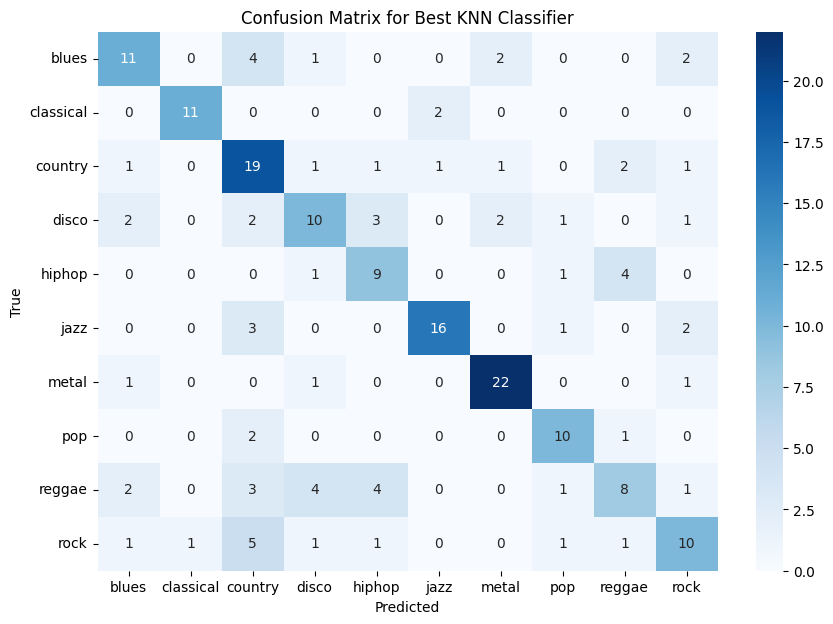

In [ ]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN Classifier")
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))